In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

- A measure of central tendency is a single value that attempts to describe a set of data, identifying the Central Portion
    1. Mean
    2. Median
    3. Mode

 ## Population Mean = $\sum_{i=1}^{N}  \frac{x_i}{N} $

- Mean is ___sensitive___ to extreme values

- When data is skewed, it is better to use median to make any conclusions

- When data is skewed, __mean__ is pulled in the direction of skew. i.e Lower than median on left skew and higher then median on right skew


- Mean is the sum of all the data points divided by the total number of data points
- Median is the middle value of the dataset where 50% of the data is less than the median, and 50% of the data is greater than the median.

In [60]:
import numpy as np
import pandas as pd

food_consumption = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-02-18/food_consumption.csv')

# Subset for Belgium and USA only
be_and_usa = food_consumption[(food_consumption['country']=='Belgium') | (food_consumption['country']=='USA') ]

# Group by country, select consumption column, and compute mean and median
print(be_and_usa.groupby('country')['consumption'].agg([np.mean, np.median]))


              mean  median
country                   
Belgium  42.132727   12.59
USA      44.650000   14.58


In [61]:
food_consumption.head()

,country,food_category,consumption,co2_emmission
0,Argentina,Pork,10.51,37.20
1,Argentina,Poultry,38.66,41.53
2,Argentina,Beef,55.48,1712.00
3,Argentina,Lamb & Goat,1.56,54.63
4,Argentina,Fish,4.36,6.96


In [62]:
rice_consumption = food_consumption[food_consumption['food_category'].isin(['Rice'])]

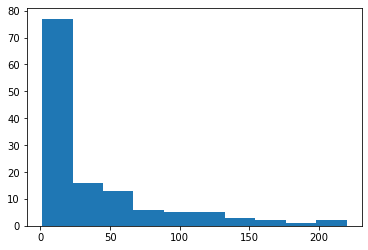

In [63]:
plt.hist(x=rice_consumption['co2_emmission'])
plt.show()

We can say that the data for co2_emission for RICE is __Right Skewed__

In [64]:
print(np.mean(rice_consumption['co2_emmission']),np.median(rice_consumption['co2_emmission']))

37.591615384615366 15.2


### MEASURES OF SPREAD

1. Variance
2. Standard Deviation
3. Mean absolute deviation

__VARIANCE__ :

Average distance from each data point to the data's mean

![](./images/variance.png)

Calculation:

1. Subtract mean from each data point
2. Square each distance
3. Sum squared distances
4. Divide by number of data points minus 1 (for sample variance)

In [65]:
def variance():
    vari

### STANDARD DEVIATION

- It is square root of the Variance
- It penalizes the longer distances more than shorter ones as it squares the distances

                                   var         std
food_category                                     
Beef                      88748.408132  297.906710
Eggs                         21.371819    4.622966
Fish                        921.637349   30.358481
Lamb & Goat               16475.518363  128.356996
Milk - inc. cheese        17671.891985  132.935669
Nuts inc. Peanut Butter      35.639652    5.969895
Pork                       3094.963537   55.632396
Poultry                     245.026801   15.653332
Rice                       2281.376243   47.763754
Soybeans                      0.879882    0.938020
Wheat and Wheat Products     71.023937    8.427570


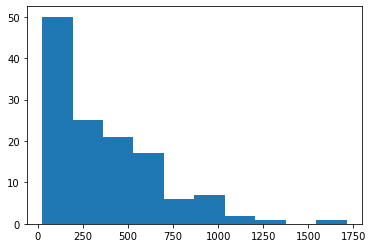

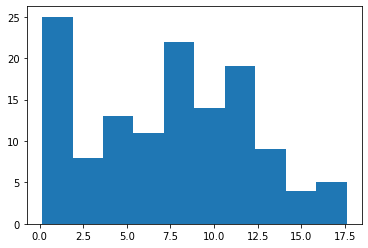

In [66]:
# Print variance and sd of co2_emission for each food_category
print(food_consumption.groupby('food_category')['co2_emmission'].agg([np.var, np.std]))

# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Create histogram of co2_emission for food_category 'beef'
plt.hist(x=food_consumption[food_consumption['food_category']=='Beef']['co2_emmission'])
# Show plot
plt.show()

# Create histogram of co2_emission for food_category 'eggs'
plt.hist(x=food_consumption[food_consumption['food_category']=='Eggs']['co2_emmission'])
# Show plot
plt.show()

### MEAN ABSOLUTE DEVIATION

- Penalizes each distance equally unlike SD

### QUANTILES

- Quantiles splits up the data in equal no of parts

- 0.5 quantile is Median



In [67]:
quantile_0_5 = np.quantile(food_consumption['consumption'],0.5)

median_consumption = np.median(food_consumption['consumption'])

print(quantile_0_5, median_consumption)

8.89 8.89


In [68]:
np.quantile(food_consumption['consumption'],[0,0.25, 0.5, 0.75, 1])

array([  0.    ,   2.365 ,   8.89  ,  28.1325, 430.76  ])

What does this mean?
- 25% of the data is between 0 and 2.365
- Next 25% of the data is between 2.365 and 8.89

- These are also calles quartiles

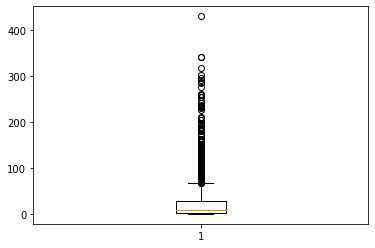

In [69]:
plt.boxplot(food_consumption['consumption'])
plt.show()

In [70]:
np.quantile(food_consumption['consumption'], np.linspace(0,1,5))

array([  0.    ,   2.365 ,   8.89  ,  28.1325, 430.76  ])

### INTER QUARTILE RANGE (IQR)

- It is the distance between the 25th and 75th percentile

In [71]:
np.quantile(food_consumption['consumption'], 0.75) - np.quantile(food_consumption['consumption'], 0.25)

25.767500000000002

In [72]:
from scipy.stats import iqr
iqr(food_consumption['consumption'])

25.767500000000002

### OUTLIERS

- Data points that are sbstantially different from others

- But, how to if a data point is an outlier or not ?

> (data < (Q1 - 1.5) * IQR ) __OR__ (data > (Q3 + 1.5) * IQR)

In [73]:
Q1 = np.quantile(food_consumption['consumption'], 0.25)
Q3 = np.quantile(food_consumption['consumption'], 0.75)
IQR = Q3 - Q1

lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR

food_consumption[(food_consumption['consumption'] < lower_threshold) | ((food_consumption['consumption'] > upper_threshold) ) ]


,country,food_category,consumption,co2_emmission
6,Argentina,Milk - inc. cheese,195.08,277.87
7,Argentina,Wheat and Wheat Products,103.11,19.66
17,Australia,Milk - inc. cheese,234.49,334.01
18,Australia,Wheat and Wheat Products,70.46,13.44
28,Albania,Milk - inc. cheese,303.72,432.62
...,...,...,...,...
1383,Sierra Leone,Rice,103.30,132.19
1394,Sri Lanka,Rice,109.72,140.41
1405,Indonesia,Rice,134.62,172.27
1416,Liberia,Rice,94.75,121.25


![](./images/outliers.png)

In [74]:
# Calculate the deciles of co2_emission
print(np.quantile(food_consumption['co2_emmission'], np.linspace(0,1,11)))

## Divides the data into 10 equal pieces

[0.00000e+00 6.68000e-01 3.54000e+00 7.04000e+00 1.10260e+01 1.65300e+01
 2.55900e+01 4.42710e+01 9.99780e+01 2.03629e+02 1.71200e+03]


In [75]:
food_consumption.groupby('country')['co2_emmission'].sum()

country
Albania      1777.85
Algeria       707.88
Angola        412.99
Argentina    2172.40
Armenia      1109.93
              ...   
Uruguay      1634.91
Venezuela    1104.10
Vietnam       641.51
Zambia        225.30
Zimbabwe      350.33
Name: co2_emmission, Length: 130, dtype: float64

Emission by country

In [76]:
# Calculate total co2_emission per country: emissions_by_country
emissions_by_country = food_consumption.groupby('country')['co2_emmission'].sum()

# Compute the first and third quantiles and IQR of emissions_by_country
q1 = np.quantile(emissions_by_country, 0.25)
q3 = np.quantile(emissions_by_country, 0.75)
iqr = q3 - q1

# Calculate the lower and upper cutoffs for outliers
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr



# Subset emissions_by_country to find outliers
outliers = emissions_by_country[(emissions_by_country < lower) | ((emissions_by_country > upper) ) ]
print(outliers)

country
Argentina    2172.4
Name: co2_emmission, dtype: float64


In [77]:
food_consumption['consumption'].sort_values(ascending=False)

149     430.76
259     341.47
116     341.23
248     318.69
28      303.72
         ...  
680       0.00
1395      0.00
658       0.00
1208      0.00
1263      0.00
Name: consumption, Length: 1430, dtype: float64

In [78]:
food_consumption.sample(20, replace=False)

,country,food_category,consumption,co2_emmission
1247,Malawi,Fish,7.33,11.70
625,Colombia,Soybeans,0.89,0.40
80,Luxembourg,Lamb & Goat,1.67,58.48
100,Kazakhstan,Poultry,18.38,19.74
57,USA,Beef,36.24,1118.29
369,Slovenia,Milk - inc. cheese,235.01,334.75
564,Bolivia,Lamb & Goat,1.72,60.23
860,Bulgaria,Beef,3.84,118.49
1129,Tanzania,Wheat and Wheat Products,15.94,3.04
1054,Belize,Soybeans,1.88,0.85


### LAW OF LARGE NUMBERS

- As the size of the sample increases, the sample mean will approach expected value

### DISCRETE DISTRIBUTIONS

In [79]:

restaurant_groups = pd.DataFrame({'group_id':['A','B','C','D','E','F','G','H','I','J'], 'group_size':[2,4,6,2,2,2,3,2,4,2]})

restaurant_groups

,group_id,group_size
0,A,2
1,B,4
2,C,6
3,D,2
4,E,2
5,F,2
6,G,3
7,H,2
8,I,4
9,J,2


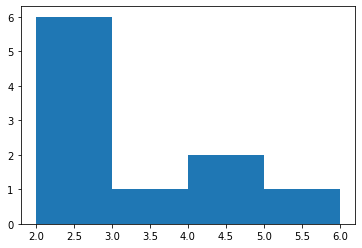

In [80]:
plt.hist(x=restaurant_groups['group_size'], bins=[2,3,4,5,6])

plt.show()

array([[<AxesSubplot:title={'center':'group_size'}>]], dtype=object)

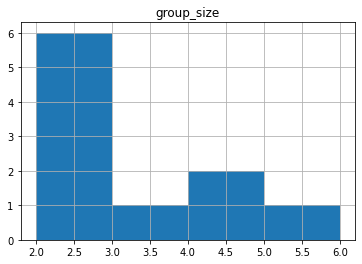

In [81]:
restaurant_groups.hist('group_size', bins=[2,3,4,5,6])

In [82]:
size_dist = restaurant_groups['group_size'] / restaurant_groups.shape[0]

size_dist

0    0.2
1    0.4
2    0.6
3    0.2
4    0.2
5    0.2
6    0.3
7    0.2
8    0.4
9    0.2
Name: group_size, dtype: float64

In [83]:
# Create probability distribution
size_dist = restaurant_groups['group_size'] / restaurant_groups.shape[0]

# Reset index and rename columns
size_dist = size_dist.reset_index()
size_dist.columns = ['group_size', 'prob']

print(size_dist)

   group_size  prob
0           0   0.2
1           1   0.4
2           2   0.6
3           3   0.2
4           4   0.2
5           5   0.2
6           6   0.3
7           7   0.2
8           8   0.4
9           9   0.2


In [84]:
# Expected value
expected_value = np.sum(size_dist['group_size'] * size_dist['prob'])

# Subset groups of size 4 or more
groups_4_or_more = size_dist[size_dist['group_size']>=4]

# Sum the probabilities of groups_4_or_more
prob_4_or_more = np.sum( groups_4_or_more['prob'])
print(prob_4_or_more)

1.4999999999999998


### CONTINUOUS DISTRIBUTIONS

In [85]:
# uniform continuous distributuon
from scipy.stats import uniform

uniform.cdf(7,0,12)

0.5833333333333334

![](./images/cdf.png)

- The probability of getting less than 7 is 0.58
- Probability of getting more than 7 is 1 - 0.58 

In [86]:
# generating uniform continuous distribution
uniform_dist = uniform.rvs(0,20,10)


Other types of distributions:
- Normal
- Binomial


Question:

The sales software used at your company is set to automatically back itself up, but no one knows exactly what time the back-ups happen. It is known, however, that back-ups happen exactly every 30 minutes. Amir comes back from sales meetings at random times to update the data on the client he just met with. He wants to know how long he'll have to wait for his newly-entered data to get backed up. Use your new knowledge of continuous uniform distributions to model this situation and answer Amir's questions.

1.  calculate the probability that Amir has to wait less than 5 minutes, and store in a variable called prob_less_than_5.
3. Calculate the probability that Amir has to wait more than 5 minutes,

In [87]:
# Min and max wait times for back-up that happens every 30 min
min_time = 0
max_time = 30

# Import uniform from scipy.stats
from scipy.stats import uniform


# Calculate probability of waiting less then or equal to 5 mins
prob_less_than_5 = uniform.cdf(5, min_time, max_time)
print(prob_less_than_5)


# Calculate probability of waiting more than 5 mins
prob_greater_than_5 = 1 - uniform.cdf(5, min_time, max_time)
print(prob_greater_than_5)

# Calculate probability of waiting 10-20 mins
prob_between_10_and_20 = uniform.cdf(20, min_time, max_time) - uniform.cdf(10, min_time, max_time)
print(prob_between_10_and_20)

0.16666666666666666
0.8333333333333334
0.3333333333333333


- Simulating wait time for Amir

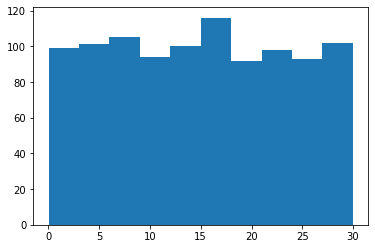

In [88]:
# Set random seed to 334
np.random.seed(100)


# Generate 1000 wait times between 0 and 30 mins
wait_times = uniform.rvs(0, 30, size=1000)

# Create a histogram of simulated times and show plot
plt.hist(wait_times)
plt.show()

### BINOMIAL DISTRIBUTION

- It has only binary outcomes (1/0 or true/false)
- Probability distribution of no of successes in a sequence of independent trials
- It is a discrete distribution
- Described by:
    - n : total no of trials

    - p : probability of success
    
    - __binom.rvs(_, p, n)__

- the expected value of a binomial distribution can be calculated by (n * p)

In [89]:

from scipy.stats import binom

binom.rvs(1, 0.5, size=10)
# above line can be interpreted as -> flip one(1) coin with success probability of 50%(0.5) for 10 times


array([0, 0, 1, 0, 0, 1, 1, 0, 1, 0])

In [90]:
binom.rvs(10, 0.5, size=1)
# -> If we flip 10 coins with 0.5 success prob for one time, how many heads(success) we will get

array([4])

In [91]:
# Now, many flips for many time
binom.rvs(8, 0.5, size=10)

# -> total no of heads for each set of flip. Note: Here each set contains 8 coins

array([1, 4, 3, 5, 0, 2, 4, 1, 5, 4])

Q) What is the probability of getting 7 heads out of 10 coins

In [92]:

# P(X(heads) = 7)

binom.pmf(7, 10, 0.5)

# i.e there is 12% percent chance that 7 coins will be heads

0.11718749999999999

In [93]:
# P(X(heads) <= 7)

binom.cdf(7, 10, 0.5)

0.9453125

In [94]:
# P(X(heads) > 7)

1 - binom.cdf(7, 10, 0.5)

0.0546875

- To apply binomial distribution, each trial must be independent

### __Simulating sales deals__
Assume that Amir usually works on 3 deals per week, and overall, he wins 30% of deals he works on. Each deal has a binary outcome: it's either lost, or won, so you can model his sales deals with a binomial distribution. In this exercise, you'll help Amir simulate a year's worth of his deals so he can better understand his performance.

1. Simulate 1 deal worked on by Amir, who wins 30% of the deals he works on.

2. Simulate a typical week of Amir's deals, or one week of 3 deals.

In [95]:
# Set random seed to 10
np.random.seed(10)

# Simulate a single deal
print(binom.rvs(1, 0.3, size=1))

# Simulate 1 week of 3 deals
print(binom.rvs(3,0.3,size=1))

# Simulate 52 weeks of 3 deals
deals = binom.rvs(3,0.3,size=52)

# Print mean deals won per week
print(deals.mean())

[1]
[0]
0.8461538461538461


### __Calculating binomial probabilities__

Just as in the last exercise, assume that Amir wins 30% of deals. He wants to get an idea of how likely he is to close a certain number of deals each week. In this exercise, you'll calculate what the chances are of him closing different numbers of deals using the binomial distribution.

1. What's the probability that Amir closes all 3 deals in a week? Save this as prob_3.

2. P(X<=1)

3. What's the probability that Amir closes more than 1 deal? Save this as prob_greater_than_1.

In [96]:

# probability of closing all 3 out of 3 deals in a week?
binom.pmf(3, 3, 0.3)



0.026999999999999996

In [97]:
# Probability of closing <= 1 deal out of 3 deals
prob_less_than_or_equal_1 = binom.cdf(1, 3, 0.3)

print(prob_less_than_or_equal_1)

# Probability of closing > 1 deal out of 3 deals
prob_greater_than_1 = 1 - prob_less_than_or_equal_1

print(prob_greater_than_1)

0.784
0.21599999999999997


Q ) 
- Calculate the expected number of sales out of the 3 he works on that Amir will win each week if he maintains his 30% win rate.

- Calculate the expected number of sales out of the 3 he works on that he'll win if his win rate drops to 25%.

- Calculate the expected number of sales out of the 3 he works on that he'll win if his win rate rises to 35%.

In [98]:
# Expected number won with 30% win rate
won_30pct = 3 * 0.3
print(won_30pct)

# Expected number won with 25% win rate
won_25pct = 3 * 0.25
print(won_25pct)

# Expected number won with 35% win rate
won_35pct = 3 * 0.35
print(won_35pct)

0.8999999999999999
0.75
1.0499999999999998


### __NORMAL DISTRIBUTION__

- Normal distribution is also called __Bell Curve__ distribution

- It is symmetrical

- Area = 1

- Curve never hits 0. i.e Probability is never 0



<div>
<img src="./images/normal_dist_68_rule.jpeg" width="500"/>
</div>


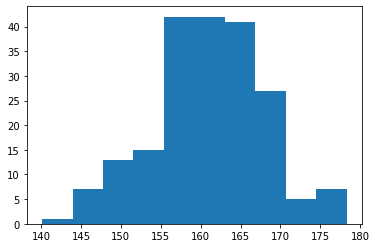

In [99]:
from scipy.stats import norm

# generating Normal Distribution

norm_distribution = norm.rvs(161, 7, size=200)

plt.hist(norm_distribution, bins=10)

plt.show()

In [100]:
# lets say above dist is about height 
# Probability of height < 155
prob_less_155 = norm.cdf(155, 161, 7)

print(prob_less_155)

# Probability of deal > 160
prob_over_160 = 1 - norm.cdf(160, 161, 7)

print(prob_over_160)


# Probability of deal between 170 and 150
prob_150_to_170 = norm.cdf(170, 161, 7) - norm.cdf(150, 161, 7)

print(prob_150_to_170)

0.19568296915377598
0.5567984968164682
0.8426870362873415


In [101]:

# Calculate amount that 25% of deals will be less than
pct_25 = norm.ppf(0.25, 161, 7)

print(pct_25)

156.27857174862743


- Say, if mean is increased by 20% and SD by 30%. then; 

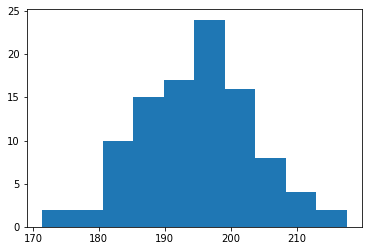

In [102]:
# Calculate new average amount
new_mean = 161 + (0.2 * 161)

# Calculate new standard deviation
new_sd = 7 + (0.3 * 7)

# Simulate 36 new sales
new_heights = norm.rvs(new_mean, new_sd, size=100)

# Create histogram and show
plt.hist(new_heights)
plt.show()

### POISSON DISTRIBUTION

Probability of some no. of events happening over a fixed period of time

- Events appear to happen at a certain rate, but completely at random

    - Example : No of animals adopted from an animal shlelter per week

It is denoted by $\lambda$

- where $\lambda = $ average no of events per time interval

-> Probability of a single value

Say, if average no of adoptions per week is 8, then P(# adoptions in a week = 5) ?

In [103]:

from scipy.stats import poisson

poisson.pmf(5, 8)

0.09160366159257921

In [104]:
# for P(# adoptions <= 5)

poisson.cdf(5, 8)

0.19123606207962532

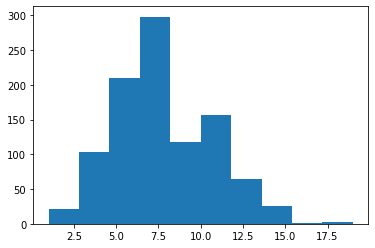

In [105]:
## GENARATING POISSION DISTRIBUTION 

poiss_dist = poisson.rvs(8, size=1000)

plt.hist(poiss_dist)
plt.show()

Q)
- Import poisson from scipy.stats and calculate the probability that Amir responds to 5 leads in a day, given that he responds to an average of 4.

- Amir's coworker responds to an average of 5.5 leads per day. What is the probability that she answers 5 leads in a day?

- What's the probability that Amir responds to 2 or fewer leads in a day?

- What's the probability that Amir responds to more than 10 leads in a day?


In [106]:
# Probability of 5 responses
prob_5 = poisson.pmf(5,4)

print(prob_5)

0.1562934518505317


In [107]:
# Probability of 5 responses
prob_coworker = poisson.pmf(5,5.5)

print(prob_coworker)

0.17140068409793663


In [108]:
# Probability of 2 or fewer responses
prob_2_or_less = poisson.cdf(2,4)

print(prob_2_or_less)

0.23810330555354436


In [109]:
# Probability of > 10 responses
prob_over_10 = 1 - poisson.cdf(10, 4)

print(prob_over_10)

0.0028397661205137315


## MORE DISTRIBUTIONS:




### EXPONENTIAL DISTRIBUTION:

- Exponential Distribution represents the probability of a certain time passing between Poisson events. 

- We can use the exponential distribution to predict, for example, the probability of more than 1 day between adoptions, the probability of fewer than 10 minutes between restaurant arrivals, and the probability of 6-8 months passing between earthquakes.

-  Just like the Poisson distribution, the time unit doesn't matter as long as it's consistent.

-  The exponential distribution uses the same lambda value, which represents the rate, that the Poisson distribution does. 

-  It's also continuous, unlike the Poisson distribution, since it represents time.

-> __CUSTOMER SERVICE REQUEST__

- On an avg one customer service request ticket is generated in every 2 minutes.
    - $\lambda = $ 0.5 customer service tickets created each time 

In [110]:
from scipy.stats import expon

# P(wait < 1 min)
expon.cdf(1, scale=.5)

0.8646647167633873

In [111]:
# P( wait > 3 min)
1 - expon.cdf(3, scale=0.5)

0.0024787521766663767

In [112]:
# P(1 < wait < 3)
ans = expon.cdf(3, scale=0.5) - expon.cdf(1, scale=0.5)

print(f"Probablity of waiting between 1 and 3 minutes for a ticket is {ans}%")

Probablity of waiting between 1 and 3 minutes for a ticket is 0.13285653105994633%


***LAMBDA in exponential distribution***

<div>
<img src="./images/expo_dist.png" width="500"/>
</div>


### T-DISTRIBUTION

- Similar shape as Normla Distribution

- Tails of t-fistribution are thicker. It means observations will more likely fall away from the mean

- Has parameters degrees of freedom(df) which affects the thickness of the tails

    - Lower df = Thicker tails, higher SD
    - Higher df = closer to normal distribution

<div>
<img src="./images/t-dist.png" width="500"/>
</div>


### LOG-NORMAL DISTRIBUTION

Examples:

- LEngth of chess game
- Adult blood pressure
- Number of hospitalizations in the 2003 SARS outbreak

## __CORRELATION__

- Correlation Coefficient quantifies the linear relationship between two variables

- Always between -1 to +

- .corr() method or visualize by scatter plot

- There are many ways to calculate correlation. But the most common one is Pearson product-moment correlation(r)


    <div>
    <img src="./images/correlation_formula.png" width="500"/>
    </div>




- Variations of calculating correlation:
    - Spearman's rho
    - kendall's tau

### Correlation Caveats:

- If relationship between two variables is not linear (say quadratic). In that case, correlation cannot find out the relation between them

- Note: When data is highlt skewed, we can apply LOG TRANSFORMATION

- Other transformations which we can use to make relationship more linear:
    - Log Transformation
    - Square Root Transformation
    - Recirocal Transformation

- But why use Transformation?
    - Certain statistical methods rely on data having Linear relationships

- Correlation doesn't imply __CAUSATION__